# Pymaceuticals Inc.
---

### Analysis

- Cursory cleaning up of the data yielded a final count of 248 mice subject to trials with any one of nine treatment regimens or were otherwise placed into a placebo control group.

- The population of mice chosen was almost evenly divided in sex between males and females.

- Of the nine treatment groups, *Capomulin* and *Ramicane* showed the most promise when reducing tumor volumes.

- Boxplot analysis suggests neither of the aforementioned treatments yielded any outlier results in terms of tumor volumes after the full duration of the treatment course.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [34]:
# Display the mouse metadata dataframe

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [35]:
# Display the study results dataframe

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [36]:
# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.

mice_pop = combined_df["Mouse ID"].nunique()
mice_pop

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_ID

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedID_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicatedID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
trial_df = combined_df[combined_df['Mouse ID'].isin(duplicated_ID)==False]
trial_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_count = trial_df["Mouse ID"].nunique()
clean_count

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = trial_df['Tumor Volume (mm3)'].groupby(trial_df['Drug Regimen']).mean()
median = trial_df['Tumor Volume (mm3)'].groupby(trial_df['Drug Regimen']).median()
var = trial_df['Tumor Volume (mm3)'].groupby(trial_df['Drug Regimen']).var()
std = trial_df['Tumor Volume (mm3)'].groupby(trial_df['Drug Regimen']).std()
sem = trial_df['Tumor Volume (mm3)'].groupby(trial_df['Drug Regimen']).sem()

drugsummary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean, 
                            "Median Tumor Volume (mm3)": median, 
                           "Tumor Volume Variance": var, 
                           "Tumor Volume Std. Dev. (mm3)": std, 
                           "Tumor Volume Std. Err.": sem})

drugsummary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev. (mm3),Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df =  trial_df.groupby(['Drug Regimen'])[
    ['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested per Drug Regimen')

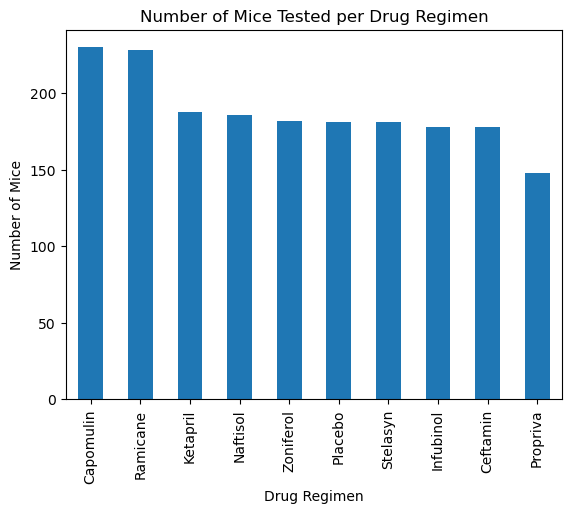

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = trial_df['Drug Regimen'].value_counts()
mice_count

pandas_bar = mice_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Tested per Drug Regimen')

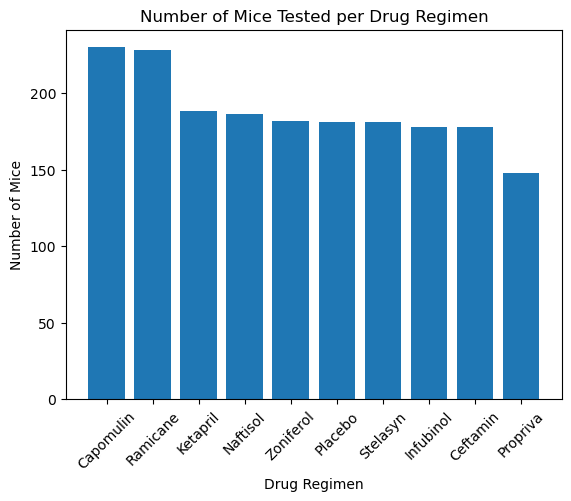

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 45)
plt.ylabel('Number of Mice')
plt.title('Number of Mice Tested per Drug Regimen')

plt.show()

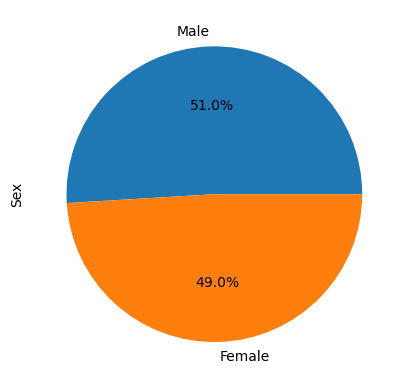

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = trial_df["Sex"].value_counts()
mice_sex.plot.pie(autopct= "%1.1f%%")
plt.show()

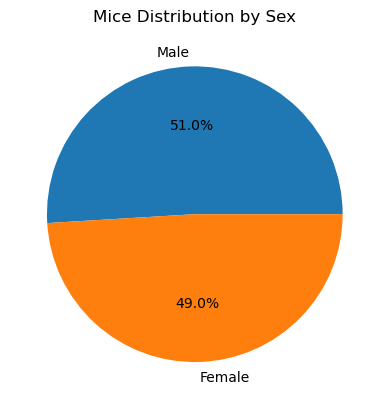

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sex_plot = plt.pie(mice_sex, labels = labels, autopct="%1.1f%%")
plt.title('Mice Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

four_drugs = trial_df.loc[(trial_df["Drug Regimen"] == "Capomulin")|(trial_df["Drug Regimen"] == "Ramicane")|
                          (trial_df["Drug Regimen"] == "Infubinol")|(trial_df["Drug Regimen"] == "Ceftamin"), :]

four_max = four_drugs.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_four = pd.merge(four_max, trial_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],
                         on = ["Mouse ID","Timepoint"],how = "left")

merged_four

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [49]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumors_box = [[] for i in range(4)]
for i in range(100):
    drug_regimen = merged_four.iloc[i,:]["Drug Regimen"]
    tum_vol = merged_four.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if drug_regimen == Treatments[j]:
            tumors_box[j].append(tum_vol)
            continue


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num, Treatment in enumerate(Treatments):
    quartiles[Num] = merged_four.loc[merged_four["Drug Regimen"] == Treatment, 
                                     :]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num] - lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
    for tumor in tumors_box[Num]:
        if tumor > upper_bound[Num] or tumor < lower_bound[Num]:
            potential_outliers[Num].append(tumor)
    if len(potential_outliers[Num]) > 0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infub

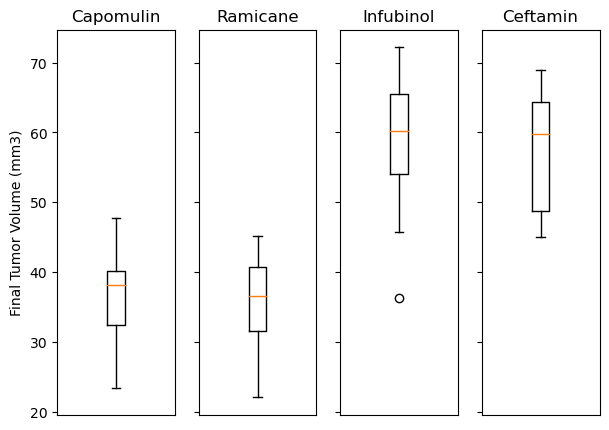

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, sharey = True, figsize = (7, 5))

ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.set_title(Treatments[0])
ax1.boxplot(tumors_box[0])
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(tumors_box[1])
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(tumors_box[2])
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(tumors_box[3])
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

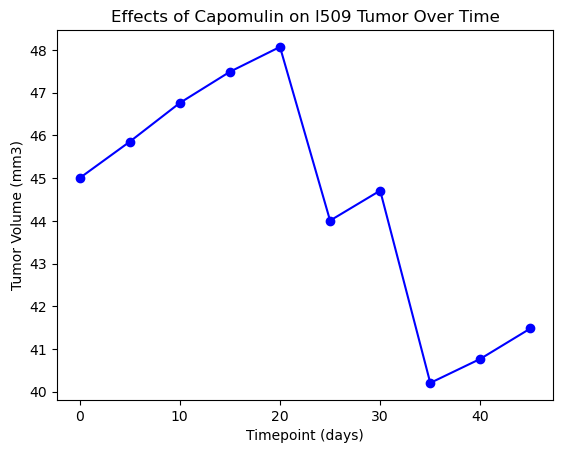

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

drug_name = "Capomulin"
selected_ID = "l509"

individual_df = trial_df.loc[(trial_df['Drug Regimen'] == drug_name) & (trial_df['Mouse ID'] == selected_ID), :]

x_axis = individual_df['Timepoint']
y_output = individual_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_output, marker = 'o', color = 'b', label = 'Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Effects of {drug_name} on {selected_ID} Tumor Over Time")

plt.show()

/var/folders/hc/1c1sdxpx7yv2_xbpx2wrxyb80000gn/T/ipykernel_1812/4139153563.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_means = trial_df.loc[(trial_df['Drug Regimen'] == drug_name)].groupby(['Mouse ID']).mean()


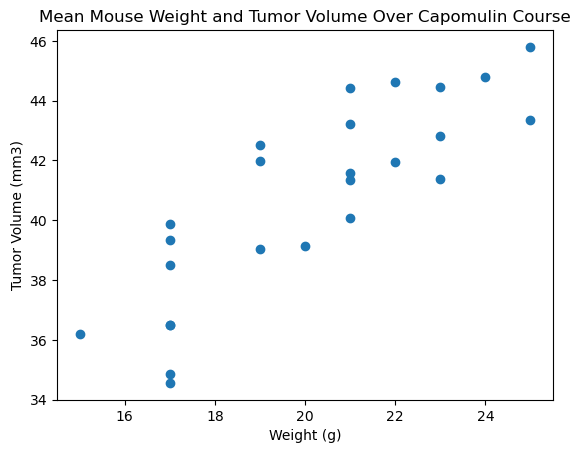

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_means = trial_df.loc[(trial_df['Drug Regimen'] == drug_name)].groupby(['Mouse ID']).mean()

plt.scatter(drug_means['Weight (g)'], drug_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Mean Mouse Weight and Tumor Volume Over {drug_name} Course")
plt.show()

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_cft = st.pearsonr(drug_means['Weight (g)'], drug_means['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_cft[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709
The line equation is y = 0.95 x + 21.55.


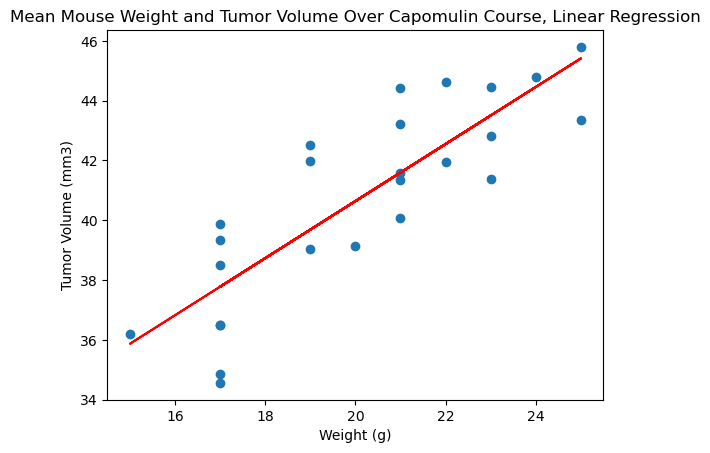

In [54]:
# Linear regression model
(slope, y_int, r_value, p_value, std_error) = st.linregress(drug_means['Weight (g)'], 
                                                            drug_means['Tumor Volume (mm3)'])
linear_reg = slope * drug_means['Weight (g)'] + y_int

plt.scatter(drug_means['Weight (g)'], drug_means['Tumor Volume (mm3)'])
plt.plot(drug_means['Weight (g)'], linear_reg, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Mean Mouse Weight and Tumor Volume Over {drug_name} Course, Linear Regression")

print(f"The r-squared is: {round(r_value**2,3)}")
print(f"The line equation is y = {round(slope, 2)} x + {round(y_int, 2)}.")
plt.show()